<a href="https://colab.research.google.com/github/jjyjung/ai/blob/gh-pages/tf_keras_DNN_SinCos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SinCos 데이터 생성**

image.png

In [ ]:
import tensorflow as tf
import numpy as np
import math

def func(x):
    y = 0.5 * (math.cos(8*x) + math.sin(4*x) - x + 0.8)
    return y

X_train = []
y_train = []

# 0.1에서 0.9까지 17개 훈련 데이터 생성
for i in range(17):
    x = 0.1 + i*0.05
    x = round(x, 2)
    y = func(x)
    X_train.append(x)
    y_train.append(y)

print("X_train", X_train)
print("y_train", y_train)

# 0.1에서 0.9까지 81개 테스트 데이터 생성 (확인용)
X_test = []
y_test = []
for i in range(81):
    x = 0.1 + i*0.01
    x = round(x, 2)
    y = func(x)
    X_test.append(x)
    y_test.append(y)
    
print("X_test", X_test)
print("y_test", y_test)

X_train [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]
y_train [0.8930625258279079, 0.7885001139358545, 0.644078284299117, 0.4876620741303771, 0.3473226852129905, 0.24661369465990107, 0.200639413623376, 0.2135446072720241, 0.2778269029810349, 0.37558176692058537, 0.4814810819952987, 0.5670090215609207, 0.6052770143330775, 0.5756451473551166, 0.46740538766530626, 0.28192819416149706, 0.03291543561870103]
X_test [0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9]
y_test [0.8930625258279079, 0.87654530463229, 0.8576495808069

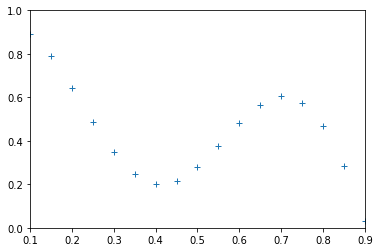

In [ ]:
import matplotlib.pyplot as plt

# 훈련 데이터 분포
plt.plot(X_train, y_train, '+')
plt.xlim([0.1, 0.9])
plt.ylim([0, 1.])
plt.show()

In [ ]:
import os
import random

# 실험결과 동일화를 위하여, 모든 random seed를 고정 
def set_seeds(seed):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
    
set_seeds(0)

In [ ]:
from tensorflow.keras import Sequential  # 모듈(변수나 함수를 포함)만 불러오기
from tensorflow.keras.initializers import RandomUniform
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# -0.5에서 +0.5 사이로 초기화
initializer = RandomUniform(minval=-0.5, maxval=0.5)

# # 모델 구조 정의하기
# model = Sequential()                  # 순차적 계층 준비
# model.add(Dense(6, input_dim=1,       # 은닉노드 6개, 입력값 1차원
#                 activation='sigmoid', # 전통적 MLP의 Sigmoid 활성함수 
#                 kernel_initializer=initializer))  # 전통적 MLP의 가중치 초기화 예시
# model.add(Dense(1, activation='linear')), # regression 문제는 선형활성함수 사용

# 모델 구조 정의하기
model = Sequential()                  # 순차적 계층 준비
model.add(Dense(6, input_dim=1,       # 은닉노드 6개, 입력값 1차원
                activation='sigmoid', # 전통적 MLP의 Sigmoid 활성함수 
                kernel_initializer=initializer))  # 전통적 MLP의 가중치 초기화 예시
model.add(Dense(3, 
                activation='sigmoid', # 전통적 MLP의 Sigmoid 활성함수 
                kernel_initializer=initializer))  # 전통적 MLP의 가중치 초기화 예시
model.add(Dense(1, activation='linear')), # regression 문제는 선형활성함수 사용


# 모델 구축하기
opt = Adam(learning_rate=0.01) # learning_rate=0.001 (default 값)
rmse = tf.keras.metrics.RootMeanSquaredError(name='rmse')
model.compile(loss='mse',         # regression 문제는 손실함수로 MSE 사용
              optimizer=opt,   # 최적화 기법으로 adam 사용
              metrics=[rmse, 'mae','mape'])

In [ ]:
# 데이터 훈련하기
hist = model.fit(X_train, y_train, epochs=100, verbose=1)

# 테스트 데이터로 평가하기
score = model.evaluate(X_test, y_test)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

Epoch 1/100
1/1 [==============================] - 0s 463ms/step - loss: 0.2148 - rmse: 0.4635 - mae: 0.4079 - mape: 91.2238
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 0.1916 - rmse: 0.4377 - mae: 0.3812 - mape: 90.3902
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 0.1698 - rmse: 0.4121 - mae: 0.3538 - mape: 89.5428
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 0.1497 - rmse: 0.3869 - mae: 0.3258 - mape: 88.6840
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 0.1315 - rmse: 0.3626 - mae: 0.2972 - mape: 87.8156
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 0.1152 - rmse: 0.3394 - mae: 0.2681 - mape: 86.9396
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 0.1012 - rmse: 0.3181 - mae: 0.2436 - mape: 88.1937
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0895 - rmse: 0.2991 - mae: 0.2267 - mape: 92.7893
Epoch 9

3/3 [==============================] - 0s 5ms/step
[0.52236724, 0.5201771, 0.517987, 0.5157969, 0.5136068, 0.5114167, 0.50922656, 0.5070365, 0.50484633, 0.5026562, 0.50046617, 0.49827605, 0.49608594, 0.49389586, 0.49170572, 0.48951563, 0.48732555, 0.4851354, 0.48294532, 0.48075518, 0.47856507, 0.47637498, 0.47418484, 0.47199476, 0.46980464, 0.46761453, 0.46542442, 0.4632343, 0.46104422, 0.4588541, 0.45666403, 0.4544739, 0.4522838, 0.4500937, 0.44790357, 0.44571346, 0.44352338, 0.44133323, 0.43914315, 0.436953, 0.43476295, 0.4325728, 0.43038273, 0.42819262, 0.4260025, 0.4238124, 0.42162228, 0.41943216, 0.41724208, 0.41505194, 0.41286188, 0.41067174, 0.40848166, 0.40629154, 0.40410143, 0.40191132, 0.3997212, 0.39753112, 0.39534098, 0.39315087, 0.39096075, 0.3887707, 0.38658056, 0.3843904, 0.38220033, 0.38001025, 0.37782013, 0.37563002, 0.37343994, 0.3712498, 0.3690597, 0.36686957, 0.36467952, 0.36248937, 0.3602993, 0.35810918, 0.35591906, 0.35372895, 0.35153884, 0.34934872, 0.3471586]


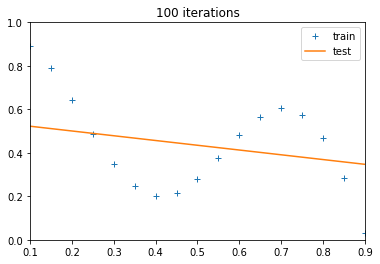

In [ ]:
import matplotlib.pyplot as plt

def draw_graph(k):
    plt.plot(X_train, y_train, '+')
    plt.plot(X_test, y_pred, '-')
    plt.legend(['train','test'], loc='upper right')

    plt.title(str(k)+" iterations")
    plt.xlim([0.1, 0.9])
    plt.ylim([0, 1.])
    plt.show()
   
y_pred = model.predict(X_test)
print(list(y_pred[:,0]))
draw_graph(100)

In [ ]:
print(hist.history.keys())

dict_keys(['loss', 'rmse', 'mae', 'mape'])


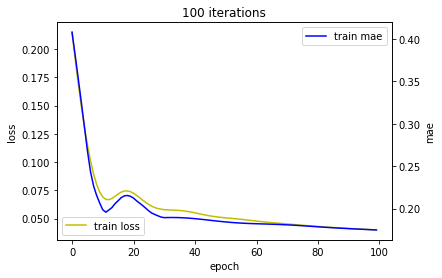

In [ ]:
def loss_graph(k):
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()

    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    acc_ax.plot(hist.history['mae'], 'b', label='train mae')

    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('mae')

    loss_ax.legend(loc='lower left')
    acc_ax.legend(loc='upper right')

    plt.title(str(k)+" iterations")
    plt.show()

loss_graph(100)

Epoch 1/2000
4/4 - 0s - loss: 0.2807 - rmse: 0.5298 - mae: 0.4813 - mape: 118.9142 - 490ms/epoch - 122ms/step
Epoch 2/2000
4/4 - 0s - loss: 0.1489 - rmse: 0.3858 - mae: 0.3260 - mape: 78.8510 - 12ms/epoch - 3ms/step
Epoch 3/2000
4/4 - 0s - loss: 0.0746 - rmse: 0.2731 - mae: 0.2107 - mape: 77.9316 - 13ms/epoch - 3ms/step
Epoch 4/2000
4/4 - 0s - loss: 0.0490 - rmse: 0.2214 - mae: 0.1875 - mape: 106.1712 - 13ms/epoch - 3ms/step
Epoch 5/2000
4/4 - 0s - loss: 0.0528 - rmse: 0.2298 - mae: 0.1882 - mape: 131.8461 - 14ms/epoch - 4ms/step
Epoch 6/2000
4/4 - 0s - loss: 0.0629 - rmse: 0.2508 - mae: 0.2043 - mape: 149.1961 - 14ms/epoch - 4ms/step
Epoch 7/2000
4/4 - 0s - loss: 0.0653 - rmse: 0.2556 - mae: 0.2085 - mape: 152.7177 - 11ms/epoch - 3ms/step
Epoch 8/2000
4/4 - 0s - loss: 0.0599 - rmse: 0.2448 - mae: 0.2013 - mape: 145.6432 - 13ms/epoch - 3ms/step
Epoch 9/2000
4/4 - 0s - loss: 0.0529 - rmse: 0.2299 - mae: 0.1901 - mape: 133.4759 - 12ms/epoch - 3ms/step
Epoch 10/2000
4/4 - 0s - loss: 0.048

3/3 [==============================] - 0s 7ms/step - loss: 6.1780e-04 - rmse: 0.0249 - mae: 0.0175 - mape: 7.9260
test_loss:  0.000618
test_rmse:  0.024855
test_mae:  0.017498
test_mape:  7.926001
3/3 [==============================] - 0s 4ms/step
[0.9018266, 0.88115656, 0.85942316, 0.83660364, 0.8126869, 0.7876766, 0.76159334, 0.73447764, 0.7063923, 0.67742467, 0.64768744, 0.617321, 0.586493, 0.5553988, 0.5242592, 0.4933202, 0.4628496, 0.43313065, 0.40445843, 0.3771254, 0.3514112, 0.32756606, 0.30579028, 0.28621712, 0.26889768, 0.25379238, 0.24077937, 0.22967699, 0.22028783, 0.21244761, 0.20607957, 0.20123544, 0.1981022, 0.19698587, 0.1982607, 0.20230058, 0.20941576, 0.21979502, 0.23347726, 0.25033727, 0.27010116, 0.29236796, 0.3166456, 0.3423793, 0.3689923, 0.39590803, 0.42257485, 0.44848576, 0.47318485, 0.49627784, 0.5174334, 0.5363809, 0.5529103, 0.56686556, 0.578141, 0.5866734, 0.59243834, 0.5954422, 0.59571946, 0.59332526, 0.58833456, 0.5808345, 0.57092464, 0.55871284, 0.5443133,

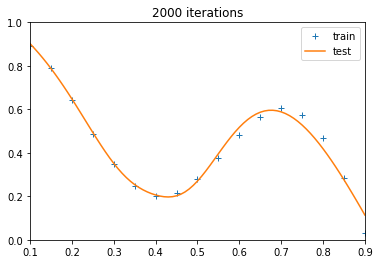

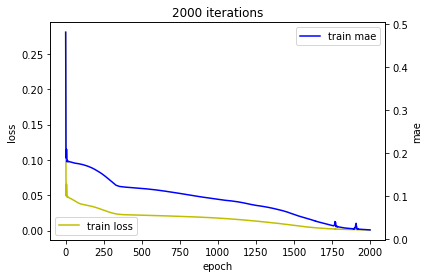

In [ ]:
from sklearn.utils import shuffle

# X_train, y_train = shuffle(X_train, y_train)

def train_k_times(k = 100):    
    global X_test, y_pred, hist
    
    # 훈련 데이터로 학습하기
    opt = Adam(0.01) # learning_rate=0.001 (default 값)
    rmse = tf.keras.metrics.RootMeanSquaredError(name='rmse')
    # model = tf.keras.models.load_model('dnn_sincos.h5')
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=[rmse, 'mae','mape'])
    hist = model.fit(X_train, y_train, epochs=k, batch_size=5, verbose=2)

    # 테스트 데이터로 평가하기
    score = model.evaluate(X_test, y_test)
    print('test_loss: ', round(score[0], 6))
    print('test_rmse: ', round(score[1], 6))
    print('test_mae: ', round(score[2], 6))
    print('test_mape: ', round(score[3], 6))
    model.save('dnn_sincos.h5')

    # 테스트 데이터의 예측값 생성하기
    y_pred = model.predict(X_test)
    print(list(y_pred[:,0]))

k = 2000
train_k_times(k)
draw_graph(k)
loss_graph(k)

In [ ]:
model.get_weights()

[array([[-0.20802486, -0.29343355, -0.2969453 , -0.2824576 , -0.08332551,
         -0.05592002]], dtype=float32),
 array([ 0.        ,  0.        ,  0.2775821 ,  0.25935224,  0.        ,
        -0.05416437], dtype=float32),
 array([[ 0.10260689],
        [-0.5160651 ],
        [ 0.88719326],
        [ 0.6700073 ],
        [ 0.26870394],
        [-0.03075839]], dtype=float32),
 array([0.24607283], dtype=float32)]

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 6)                 12        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________
